# Block Release

This notebook contains the skeleton of the code to be used for the tasks.

## Imports

In [22]:
import pandas as pd
import requests

## Locations

In [23]:
# coordinates are latitude, longitude pairs
LOCATION_UNIVERSITY_PARK = (52.93726647677705, -1.1959384006396074)
LOCATION_JUBILEE_CAMPUS = (52.95232635429298, -1.1862643609249397)
LOCATION_NOTTINGHAM_CITY_CENTRE = (52.953, -1.149)

## API

You will need to add more API URLs here as needed to complete the stories.

In [24]:
API_STREET_CRIME = "https://data.police.uk/api/crimes-street/"

## Crimes Near University Park Campus

Example function which calculates the number of crimes within 1 mile of University Park campus.

Burglaries in 1/2022: 119
Burglaries in 2/2022: 172
Burglaries in 3/2022: 202
Burglaries in 4/2022: 149
Burglaries in 5/2022: 176
Burglaries in 6/2022: 153
Burglaries in 7/2022: 138
Burglaries in 8/2022: 165
Burglaries in 9/2022: 130
Burglaries in 10/2022: 174
Burglaries in 11/2022: 187
Burglaries in 12/2022: 148


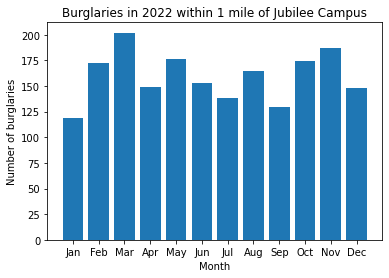

In [9]:
import requests
import matplotlib.pyplot as plt
import calendar


def count_burglaries(location: tuple) -> list[int]:
    burglaries_by_month = []

    for month in range(1, 13):
        url = (
            "https://data.police.uk/api/crimes-street/all-crime"
            f"?lat={location[0]}"
            f"&lng={location[1]}"
            f"&date=2022-{month:02}"
            "&category=burglary"
        )

        response = requests.get(url)

        if response.status_code == 200:
            burglaries_by_month.append(len(response.json()))
        else:
            print(f"Error retrieving data: {response.status_code}")
            burglaries_by_month.append(0)

    return burglaries_by_month


burglaries_by_month = count_burglaries(LOCATION_JUBILEE_CAMPUS)

for month, burglaries in enumerate(burglaries_by_month, start=1):
    print(f"Burglaries in {month}/2022: {burglaries}")

month_names = [calendar.month_abbr[i] for i in range(1, 13)]
plt.bar(month_names, burglaries_by_month)
plt.title("Burglaries in 2022 within 1 mile of Jubilee Campus")
plt.xlabel("Month")
plt.ylabel("Number of burglaries")
plt.show()